In [92]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


$E = E_{int}$ + $E_{kin} \\$

$\frac{dE}{dt} = \frac{dE_{int}}{dt} + \frac{dE_{kin}}{dt} \\$

As the total energy is constant , $ \frac{dE}{dt} = 0$ , i.e. total energy in the system is fixed. 

$\\E_{kin} = \frac{1}{2}Mv^2 \qquad E_{int} = TdS - pdV \quad\rightarrow\quad TdS = 0 \quad\rightarrow\quad E_{int} = pdV \\$

$\frac{d}{dt}\left(\frac{1}{2}Mv^2\right) = p\frac{dV}{dt} \\ $

For a photon gas, pressure is given by $P  = \frac{e}{3} = \frac{E}{3V} \qquad V = 4\pi R^2 \Delta R  = \alpha 4\pi R^3 \\$

$\Delta R$ is the thickness of the shell, $\alpha$ is the rate at which it develops.

$ \frac{dV}{dt} = 4\pi\alpha\left(3R^2\right)\frac{dR}{dt} = \frac{3V}{R}\frac{dR}{dt} = \frac{3V}{R}v \\$

Now we can substitute back into the original equation for energy:

$\frac{d}{dt}\left(\frac{1}{2}Mv^2\right) = p\frac{dV}{dt} \quad\rightarrow\quad \frac{1}{2}Mv \frac{dv}{dt} = \frac{3V}{R} \frac{E}{3V} = \frac{E}{R} \quad\rightarrow\quad \frac{dE_{int}}{dt} = \frac{E_{int}}{R}v \\$

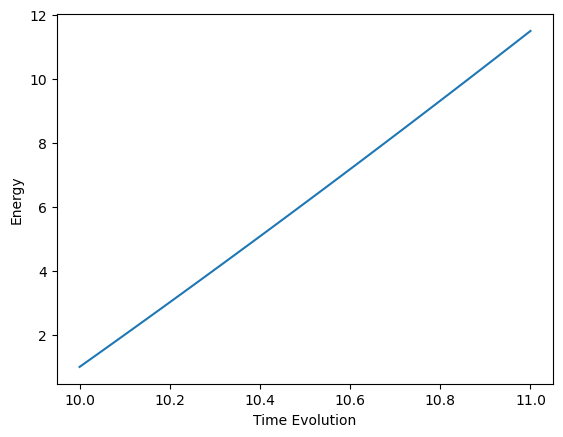

In [120]:

# Simulating the mass layer moving at an arbitrary velocity v
c = 3 * 10**8
t = np.linspace(0, 1, 100)
M = 1
v0 = 1
Eint0 = 10
R0 = 1
y0 = [R0, v0, Eint0]

def energy(y, t):
    Eint= y[0]
    R = y[1]
    v = y[2]
    
    dEint = -(Eint / R) * v
    dR = v
    dv = Eint / M*R
    return[dEint, dR, dv]

Edep = odeint(energy, y0, t)
E = Edep[:, 0]
R = Edep[:, 1]
v = Edep[:, 2]

plt.figure()
plt.plot(t, R, label='E')
plt.xlabel('Time Evolution')
plt.ylabel('Energy')
plt.show()

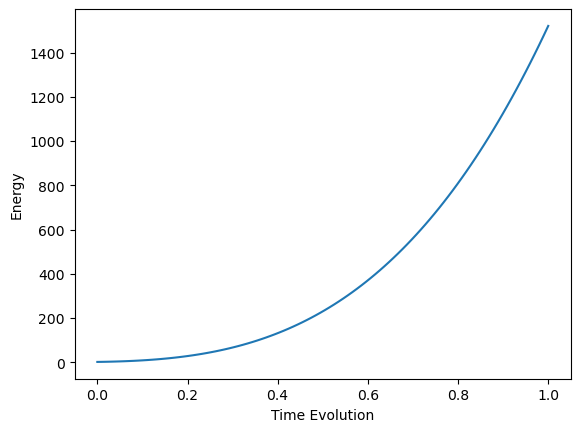

In [124]:
t = np.linspace(0, 1, 100)
M = 1
v0 = 1
Eint0 = 10
R0 = 1
V0 = 1
y0 = [R0, v0, Eint0, V0]

def energy(y, t):
    Eint= y[0]
    R = y[1]
    v = y[2]
    V = y[3]
    dEint = -(Eint / R) * v
    dR = v
    dv = Eint / M*R
    dV = 3*V / R * v
    return[dEint, dR, dv, dV]

Edep = odeint(energy, y0, t)
E = Edep[:, 0]
R = Edep[:, 1]
v = Edep[:, 2]
V = Edep[:, 3]
plt.figure()
plt.plot(t, V, label='E')
plt.xlabel('Time Evolution')
plt.ylabel('Energy')
plt.show()